In [83]:
import pandas as pd
import glob

### READING IN AND MUNGING THE DATA ###

read_files = glob.glob('/Users/andreasmartinson/Documents/training/*')
read_files.pop(read_files.index("/Users/andreasmartinson/Documents/training/p000001.psv"))

# credit for the basic idea for the code below goes to the following post on stackoverflow: 
# https://stackoverflow.com/questions/2512386/how-to-merge-200-csv-files-in-python

result_file=open("/Users/andreasmartinson/Documents/training/result_file.psv","w")
# first file:
result_file.write('patient no|')
result_file.write('hour no|')
hr_ct = '1'

for line in open("/Users/andreasmartinson/Documents/training/p000001.psv"):
    result_file.write(line)
    result_file.write('1|')
    result_file.write(hr_ct+'|')
    hr_ct = int(hr_ct)
    hr_ct +=1
    hr_ct = str(hr_ct)

# now the rest
count = '2'

for file in read_files:
    hr_ct = '1'
    f = open(file)
    f.__next__() # skip the header
    for line in f:
         result_file.write(line)
         result_file.write(count+'|')
         result_file.write(hr_ct+'|')
         hr_ct = int(hr_ct)
         hr_ct +=1
         hr_ct = str(hr_ct)
    f.close() # not really needed
    count = int(count)
    count += 1
    count = str(count)

f.close()

# end credit to stackoverflow source


                
                



Statistics by Hour

              HR                                                        
           count       mean        std   min    25%   50%     75%    max
hour no                                                                 
1        19780.0  84.956484  17.730859  30.0  73.00  83.5  95.000  167.5
2        19661.0  84.884085  17.558216  30.0  73.00  83.5  95.000  178.5
3        19486.0  84.735041  17.372828  27.5  73.00  83.0  95.000  180.0
4        19513.0  84.690622  17.373671  29.0  72.00  83.0  95.000  167.0
5        19501.0  84.740372  17.224329  28.0  72.00  84.0  95.000  176.0
6        19450.0  84.779820  17.166432  29.0  72.50  84.0  95.000  175.0
7        19381.0  84.725169  17.203292  26.0  72.00  84.0  95.000  200.0
8        19381.0  84.662427  17.092622  30.0  73.00  84.0  95.000  173.0
9        19186.0  84.555509  17.120907  31.0  72.00  84.0  95.000  167.0
10       19031.0  84.588256  17.017840  24.0  72.00  84.0  95.000  166.0
11       18808.0  84.547926  1

           Temp                                                             
          count       mean       std    min      25%     50%      75%    max
hour no                                                                     
1        6870.0  36.336191  0.896056  29.94  35.8000  36.300  36.8900  40.22
2        7499.0  36.565322  0.809404  30.50  36.1000  36.500  37.0000  41.97
3        8055.0  36.750689  0.763806  31.60  36.2800  36.720  37.1800  42.22
4        8147.0  36.870065  0.773551  26.67  36.4000  36.830  37.3300  41.92
5        7886.0  36.959443  0.779047  20.90  36.5000  36.950  37.4000  41.64
6        7616.0  37.039530  0.776747  26.67  36.5600  37.000  37.5000  41.54
7        7772.0  37.085122  0.782223  31.44  36.6000  37.100  37.6000  41.64
8        7854.0  37.099090  0.793157  30.22  36.6000  37.100  37.6000  41.71
9        7710.0  37.121048  0.778141  32.39  36.6100  37.110  37.6100  41.60
10       7516.0  37.136794  0.763403  31.33  36.6700  37.170  37.6700  41.06

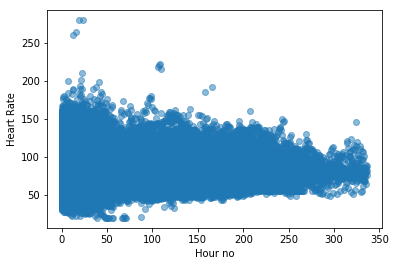


Scatterplot #2



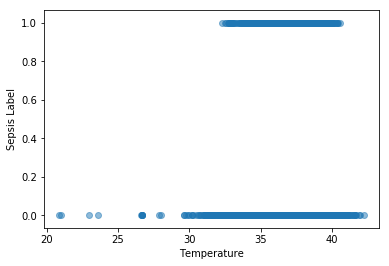

In [83]:
### PROVIDING DATA STATISTICS ###

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/andreasmartinson/Documents/training/result_file.psv", sep = '|')

## Stats by Hour

print('\nStatistics by Hour\n')
data_copy = data[['hour no','HR','O2Sat','Temp','SepsisLabel']]
data_grouped = data_copy.groupby('hour no')

data_HR = data_grouped[['HR']]
data_O2Sat = data_grouped[['O2Sat']]
data_Temp = data_grouped[['Temp']]
data_SepsisLabel = data_grouped[['SepsisLabel']]

print(data_HR.describe())
print(data_O2Sat.describe())
print(data_Temp.describe())
print(data_SepsisLabel.describe())

## Balance of the data

print('\nBalance of some of the column data\n')

print('\n By Sepsis Label\n')
print(data['SepsisLabel'].value_counts()) 

print('\nBy Patient No\n')

print(data['patient no'].value_counts())

## Count of the data available for those who have sepsis

print('\nCount of Available Data for Hours People were Diagnosed with Sepsis\n')
data_sepsis = data.loc[data['SepsisLabel'] == 1]
data_sepsis = data_sepsis[['hour no']]
print(data_sepsis.count())

## Scatterplot of hour and heart rate

# plt.scatter(data[['hour no']], data[['HR']], alpha=0.5)

print('\nScatterplot #1\n')
plt.scatter(data[['hour no']], data[['HR']], alpha=0.5)
plt.xlabel('Hour no')
plt.ylabel('Heart Rate')
plt.show()

## Scatterplot of temperature and sepsis

print('\nScatterplot #2\n')
plt.scatter(data[['Temp']], data[['SepsisLabel']], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Sepsis Label')
plt.show()

                   
